# 라이브러리 및 데이터 불러오기

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os as os
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import scipy as sp
from sklearn.preprocessing import MinMaxScaler
from scipy.special import boxcox1p
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from imblearn.under_sampling import *
from imblearn.over_sampling import *
from imblearn.combine import *
plt.style.use('seaborn')

In [0]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/test.csv')
sample_submission = pd.read_csv('/content/drive/My Drive/Colab Notebooks/sample_submission.csv')

In [0]:
set(sample_submission.columns)

{'GALAXY',
 'QSO',
 'REDDEN_STD',
 'ROSAT_D',
 'SERENDIPITY_BLUE',
 'SERENDIPITY_DISTANT',
 'SERENDIPITY_FIRST',
 'SERENDIPITY_MANUAL',
 'SERENDIPITY_RED',
 'SKY',
 'SPECTROPHOTO_STD',
 'STAR_BHB',
 'STAR_BROWN_DWARF',
 'STAR_CARBON',
 'STAR_CATY_VAR',
 'STAR_PN',
 'STAR_RED_DWARF',
 'STAR_SUB_DWARF',
 'STAR_WHITE_DWARF',
 'id'}

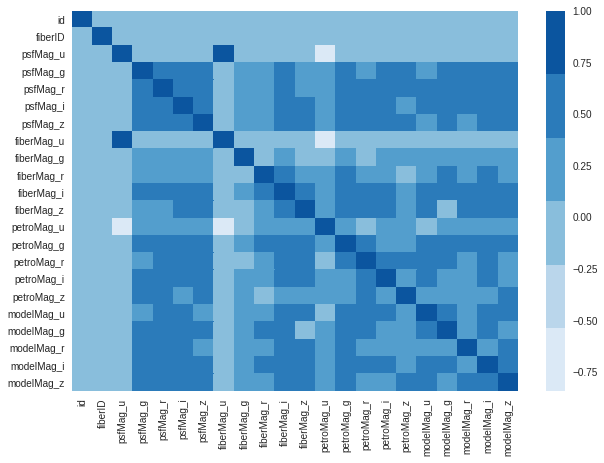

In [66]:
corr = train.corr()
cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, cmap=cmap)

In [0]:
corr

,id,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
id,1.000000,-0.000324,-0.001495,0.003652,-0.000154,0.000830,0.002073,-0.001432,-0.001708,-0.000471,0.001204,0.001797,0.001265,0.003260,-0.002406,0.000851,0.000094,-0.001717,0.000224,0.004030,-0.000993,0.002448
fiberID,-0.000324,1.000000,0.002673,0.003424,0.001901,0.004731,0.004108,0.002785,0.000951,0.004014,0.004143,0.004074,-0.000519,0.003111,0.002913,0.004261,0.001998,0.002441,0.003299,0.003050,0.005851,0.004217
psfMag_u,-0.001495,0.002673,1.000000,0.007163,0.008022,0.008373,0.007613,0.999612,0.001737,0.005493,0.007417,0.005179,-0.844577,0.006210,0.007035,0.005979,0.006911,0.005475,0.005218,0.006855,0.006553,0.009054
psfMag_g,0.003652,0.003424,0.007163,1.000000,0.656575,0.675570,0.529464,0.018975,0.147544,0.246507,0.479143,0.376652,0.132693,0.611664,0.139764,0.489554,0.458087,0.211310,0.485867,0.637270,0.424497,0.624421
psfMag_r,-0.000154,0.001901,0.008022,0.656575,1.000000,0.537715,0.451904,0.013608,0.120586,0.350773,0.498966,0.378253,0.118255,0.535407,0.487657,0.449181,0.677228,0.450860,0.550238,0.516004,0.590266,0.538881
psfMag_i,0.000830,0.004731,0.008373,0.675570,0.537715,1.000000,0.648709,0.018252,0.134389,0.352580,0.505415,0.385155,0.110858,0.682430,0.471127,0.523036,0.363586,0.557699,0.452765,0.523340,0.581413,0.640439
psfMag_z,0.002073,0.004108,0.007613,0.529464,0.451904,0.648709,1.000000,0.018465,0.121613,0.302411,0.557741,0.535643,0.141354,0.586643,0.552653,0.657507,0.419934,0.311835,0.448141,0.347738,0.658930,0.628597
fiberMag_u,-0.001432,0.002785,0.999612,0.018975,0.013608,0.018252,0.018465,1.000000,0.003690,0.002805,0.016168,0.013710,-0.841471,0.017214,0.012957,0.015468,0.007720,0.013842,0.014747,0.020647,0.007937,0.018597
fiberMag_g,-0.001708,0.000951,0.001737,0.147544,0.120586,0.134389,0.121613,0.003690,1.000000,0.063919,0.119069,0.062515,0.028254,0.109501,0.066799,0.109731,0.099121,0.101207,0.112340,0.090383,0.099054,0.139623
fiberMag_r,-0.000471,0.004014,0.005493,0.246507,0.350773,0.352580,0.302411,0.002805,0.063919,1.000000,0.492312,0.340019,0.086974,0.426770,0.171021,0.225000,0.012828,0.333907,0.411668,0.273085,0.485412,0.330141


# 데이터 이상치 제거 (-100,100)

In [0]:
for feat in ['psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i',
       'psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i',
       'fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i', 'petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z']:
    train.drop(train[train[feat] > 100][feat].index,axis=0,inplace=True)

In [0]:
for feat in ['psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i',
       'psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i',
       'fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i', 'petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z']:
    train.drop(train[train[feat] <-100][feat].index,axis=0,inplace=True)

In [0]:
train

,id,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,...,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
0,0,QSO,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,...,22.504317,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340
1,1,QSO,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,...,21.360701,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314
2,2,QSO,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,...,17.867253,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928
3,3,QSO,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,...,20.433907,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855
4,4,STAR_RED_DWARF,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,...,25.859229,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199986,199986,QSO,568,20.630780,20.437920,20.050756,20.020974,19.959646,20.948519,20.726709,...,20.836400,20.536338,20.126561,20.102815,19.796722,20.783295,20.326879,20.014046,20.061940,19.862513
199987,199987,GALAXY,362,25.283695,22.807243,21.069792,20.187531,19.595598,26.677671,22.818723,...,28.895442,22.250489,20.091693,18.985791,18.803354,26.921903,21.952440,19.776321,18.990039,18.528306
199988,199988,STAR_RED_DWARF,146,23.609826,21.902709,20.330747,18.457535,17.326771,24.320816,22.287946,...,25.982378,22.132993,20.329624,18.507337,17.418521,24.503460,21.897599,20.420524,18.443126,17.331724
199989,199989,GALAXY,85,21.172003,20.561208,20.031754,19.793644,19.540471,21.704126,20.469748,...,18.880781,18.065559,17.501307,17.180639,17.175205,19.109086,18.004976,17.440331,17.193743,16.969854


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199870 entries, 0 to 199990
Data columns (total 23 columns):
id            199870 non-null int64
type          199870 non-null object
fiberID       199870 non-null int64
psfMag_u      199870 non-null float64
psfMag_g      199870 non-null float64
psfMag_r      199870 non-null float64
psfMag_i      199870 non-null float64
psfMag_z      199870 non-null float64
fiberMag_u    199870 non-null float64
fiberMag_g    199870 non-null float64
fiberMag_r    199870 non-null float64
fiberMag_i    199870 non-null float64
fiberMag_z    199870 non-null float64
petroMag_u    199870 non-null float64
petroMag_g    199870 non-null float64
petroMag_r    199870 non-null float64
petroMag_i    199870 non-null float64
petroMag_z    199870 non-null float64
modelMag_u    199870 non-null float64
modelMag_g    199870 non-null float64
modelMag_r    199870 non-null float64
modelMag_i    199870 non-null float64
modelMag_z    199870 non-null float64
dtypes: float64(20),

In [0]:
train.describe()

,id,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,...,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
count,199870.000000,199870.000000,199870.000000,199870.000000,199870.000000,199870.000000,199870.000000,199870.000000,199870.000000,199870.000000,...,199870.000000,199870.000000,199870.000000,199870.000000,199870.000000,199870.000000,199870.000000,199870.000000,199870.000000,199870.000000
mean,99993.699905,360.856367,20.984730,19.861573,19.287896,18.873143,18.612581,21.171580,20.089962,19.505246,...,20.713770,19.602944,19.008314,18.606675,18.392966,20.731675,19.531376,18.940282,18.520904,18.277182
std,57736.396468,225.320791,2.109118,1.885391,1.725572,1.644444,1.686860,2.002260,1.842836,1.708019,...,2.554394,2.129208,2.019242,1.969096,2.102195,2.187580,1.959942,1.860606,1.797316,1.867411
min,0.000000,1.000000,-50.604591,-39.728588,-43.795556,-30.711890,-7.729289,-55.669722,-8.294703,-14.662435,...,-91.981712,-52.501232,-56.256807,-85.363370,-85.554704,3.444448,12.498143,10.286917,11.337467,10.977328
25%,49992.250000,174.000000,19.652922,18.701806,18.048832,17.748033,17.426024,19.941450,18.903685,18.259891,...,19.248384,18.114607,17.480474,17.051227,16.805341,19.266211,18.076275,17.423563,16.977867,16.705819
50%,99990.500000,349.000000,20.871263,19.904200,19.454489,19.043982,18.611717,21.049302,20.069362,19.632082,...,20.366902,19.586694,19.182970,18.693890,18.174579,20.406405,19.547546,19.143249,18.641870,18.100950
75%,149997.750000,526.000000,22.159351,21.149526,20.515543,20.073426,19.883448,22.337170,21.385845,20.773985,...,21.796574,21.003693,20.457040,20.019000,19.807088,21.991854,20.961541,20.407636,19.968730,19.819314
max,199990.000000,1000.000000,77.520279,80.718007,54.501228,92.489652,42.136572,75.780089,37.745406,32.574603,...,99.426201,73.393598,99.770900,95.729182,93.303110,49.487277,59.987842,33.666494,45.783550,61.597879


# 이상치 제거후 플롯

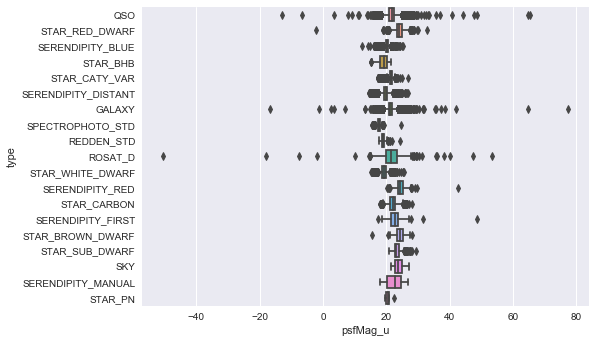

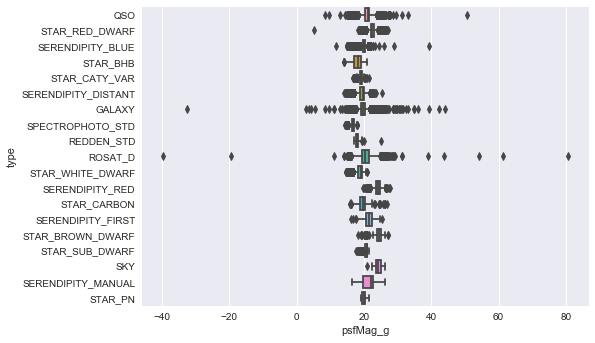

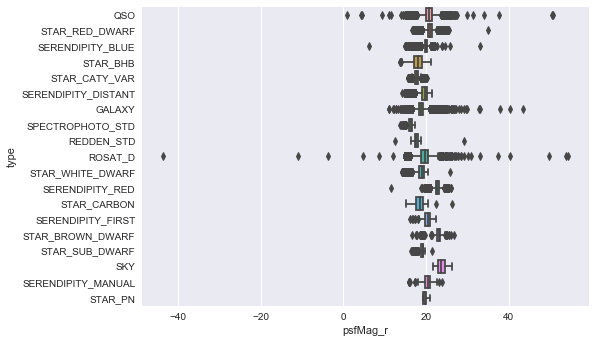

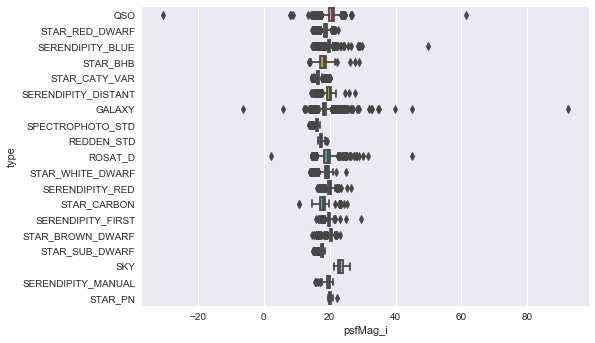

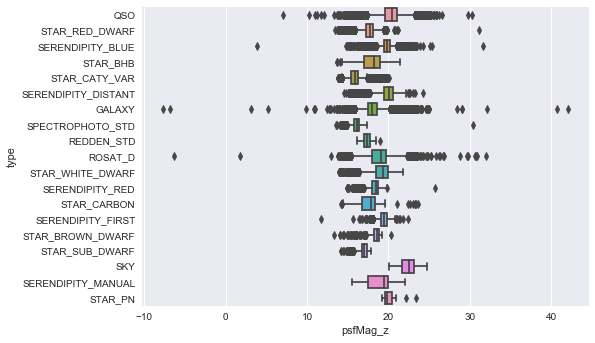

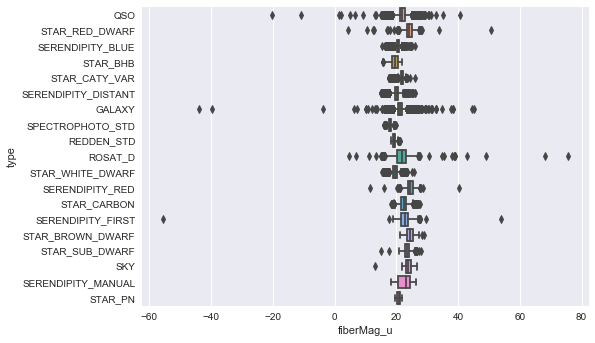

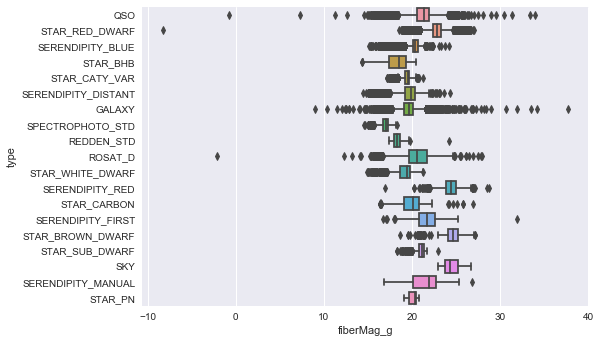

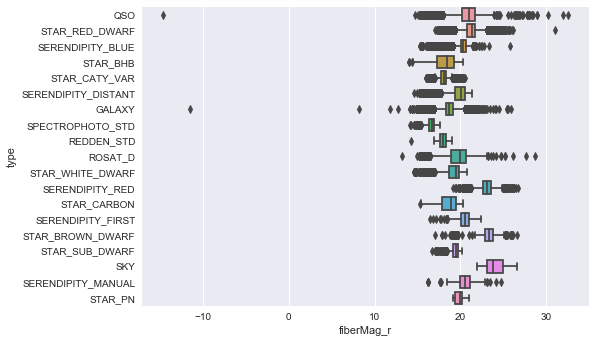

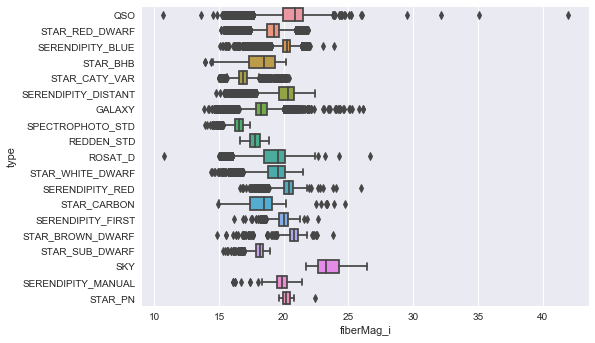

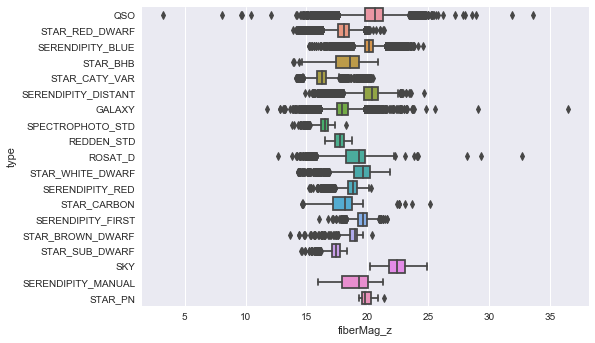

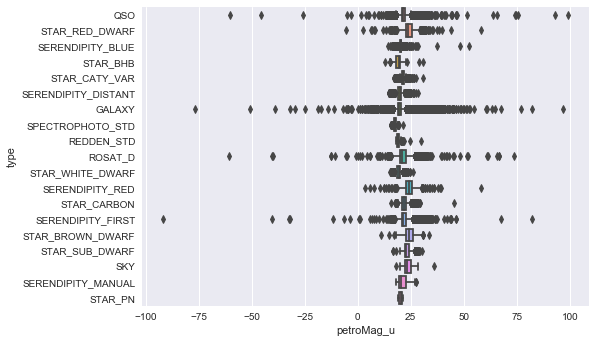

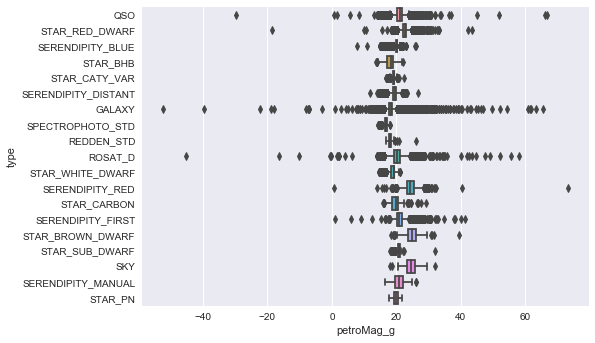

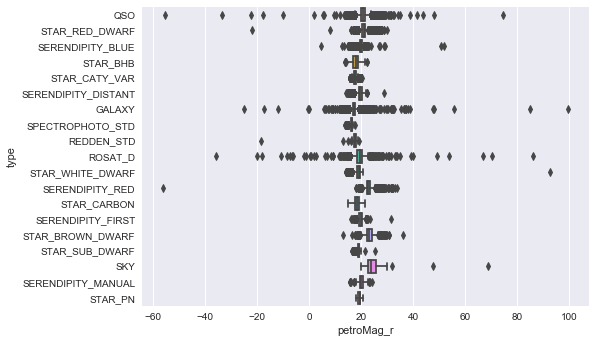

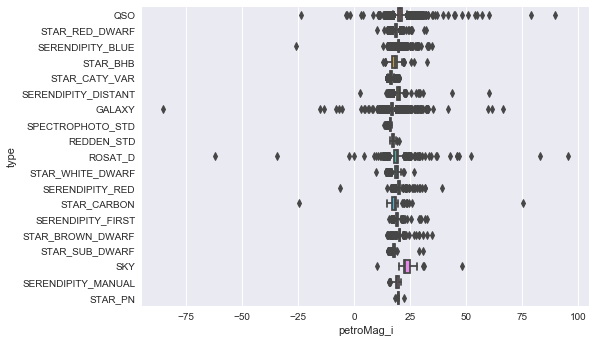

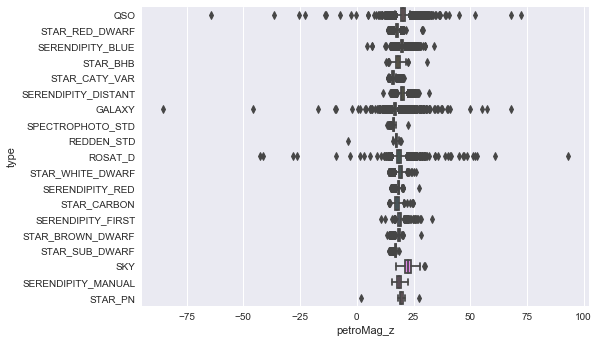

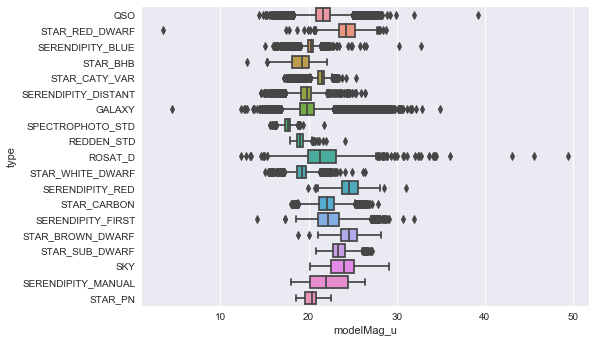

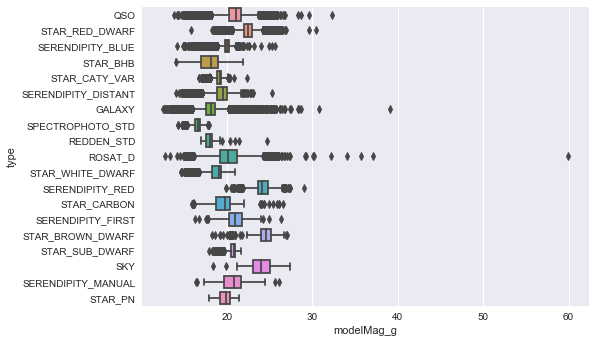

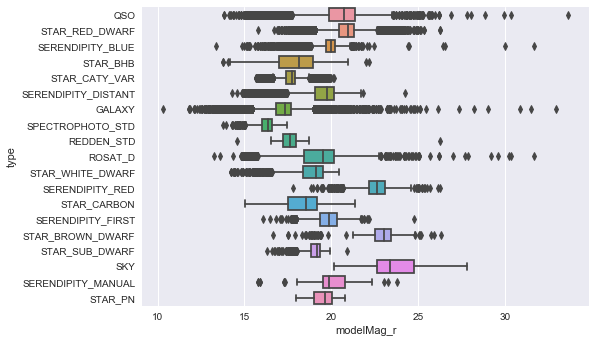

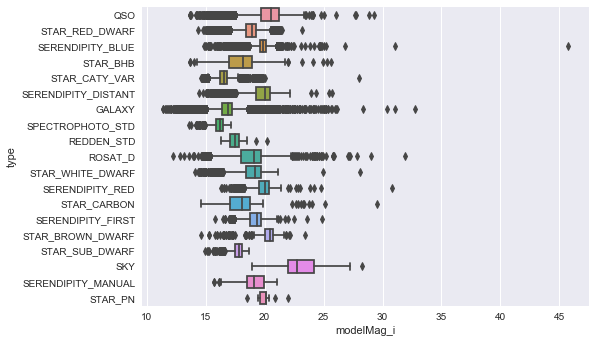

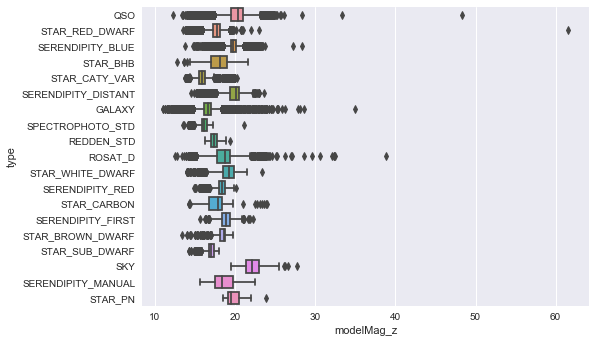

In [0]:
for col in train.drop(columns=['id','fiberID','type']).columns:
    sns.boxplot(y="type",x=train[col],data=train)
    plt.show()

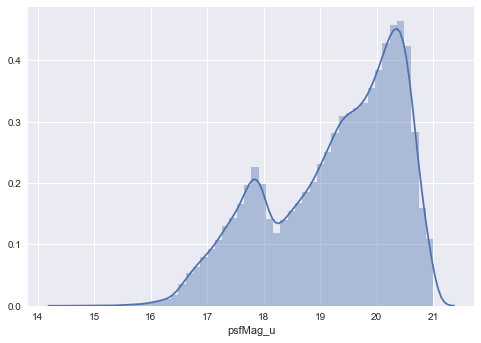

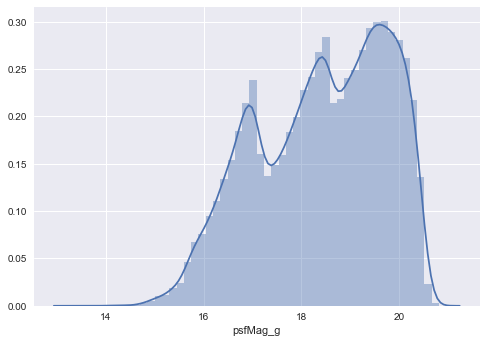

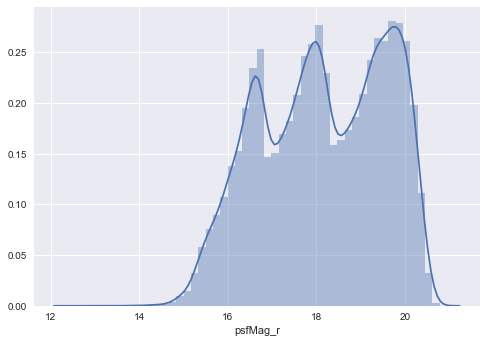

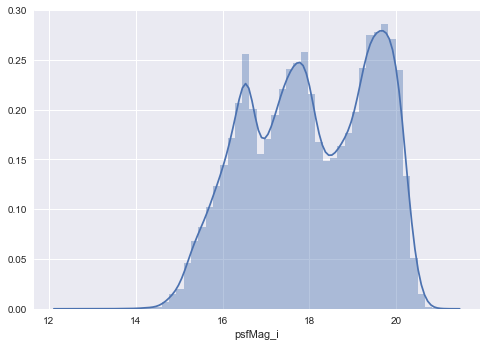

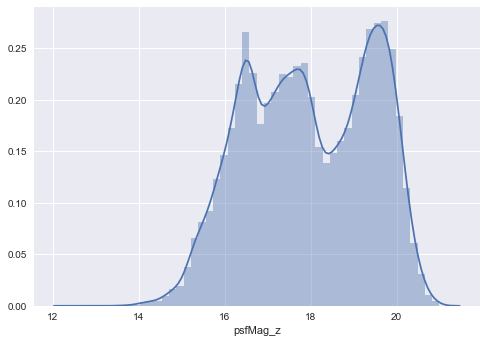

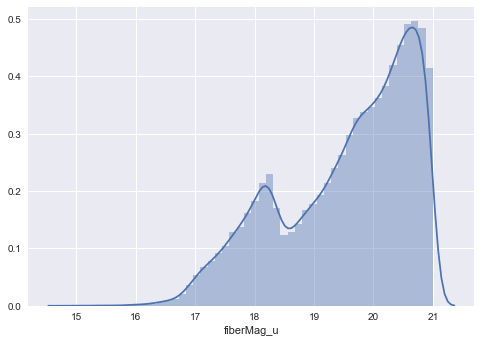

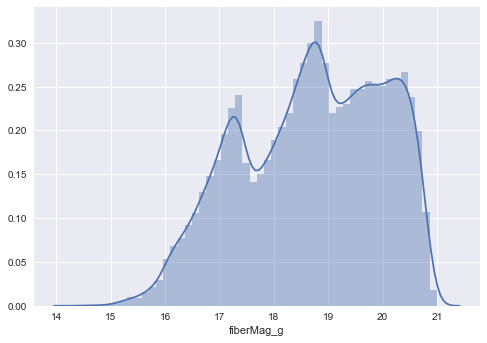

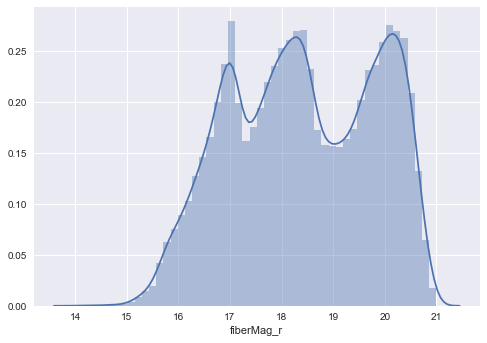

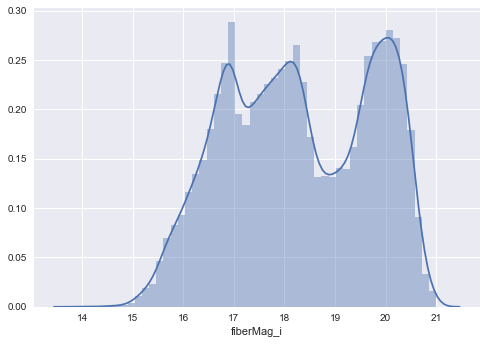

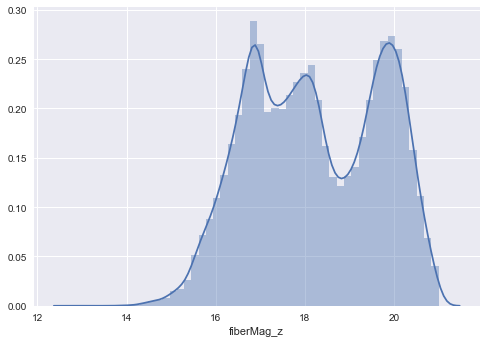

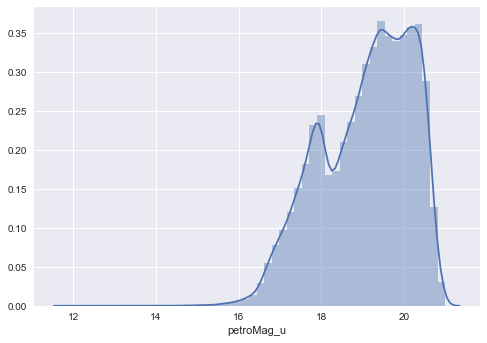

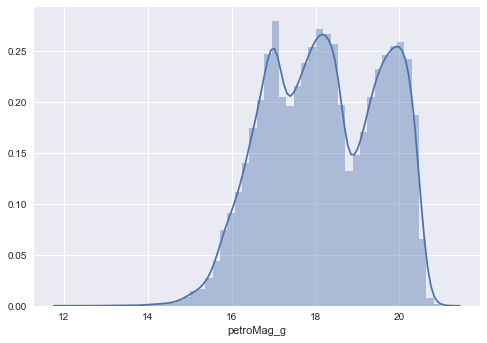

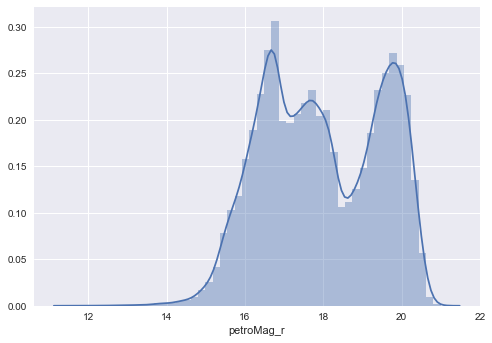

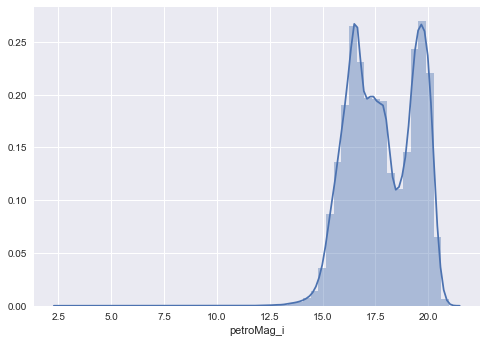

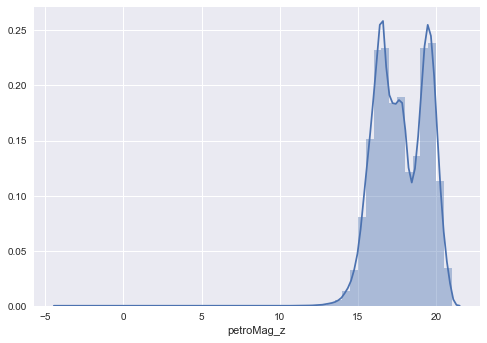

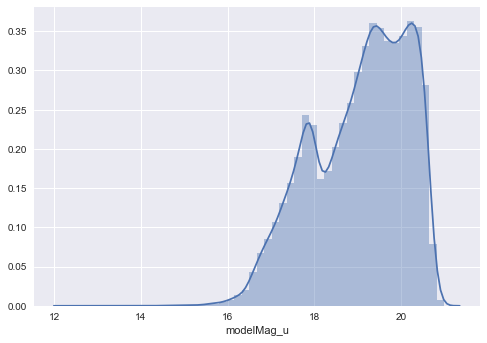

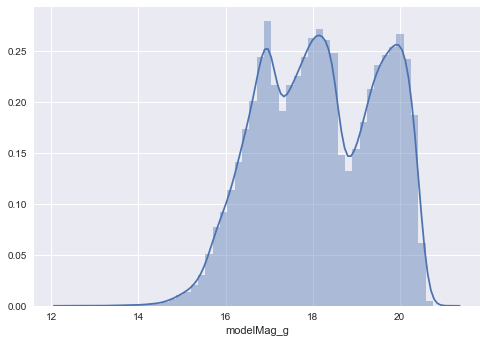

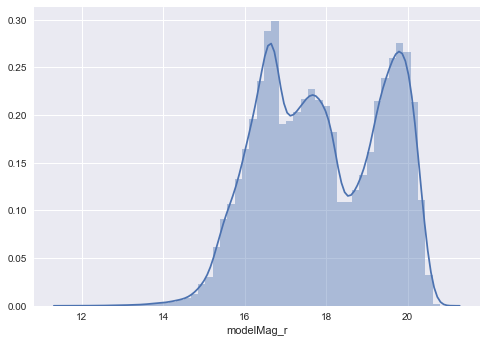

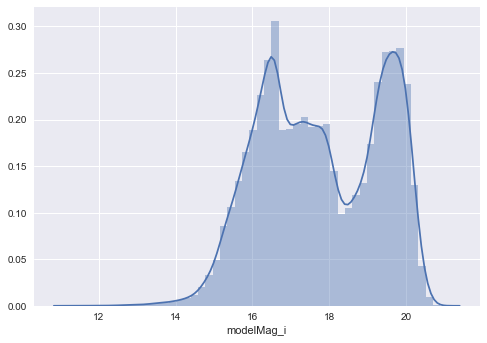

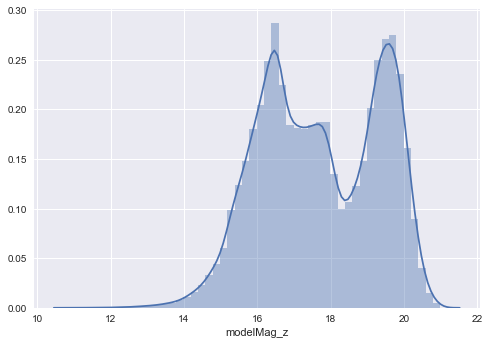

In [0]:
for col in train.drop(columns=['id','fiberID','type']).columns:
    sns.distplot(train[col])
    plt.show()

In [0]:
sns.pairplot(data=train.drop(columns=['id','fiberID']),hue='type',diag_kind='kde')

# 이상치 제거 후 Correlation Matrix

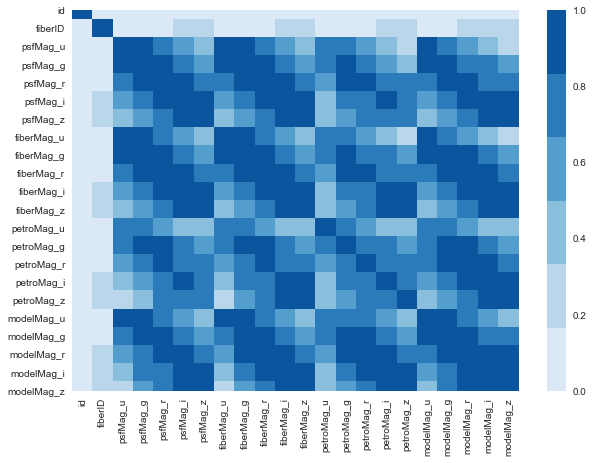

In [0]:
corr = train.corr()
cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, cmap=cmap)

# MinMax Scale

In [0]:
mm = MinMaxScaler()
mm.fit(np.array(train[['psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i',
       'psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i',
       'fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i', 'petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z']]).reshape(len(train['fiberMag_u']),-1))
train[['psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i',
       'psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i',
       'fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i', 'petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z']]=mm.transform(np.array(train[['psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i',
       'psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i',
       'fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i', 'petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z']]).reshape(len(train['psfMag_u']),-1))

In [0]:
train.describe()

,id,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,...,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
count,199870.000000,199870.000000,199870.000000,199870.000000,199870.000000,199870.000000,199870.000000,199870.000000,199870.000000,199870.000000,...,199870.000000,199870.000000,199870.000000,199870.000000,199870.000000,199870.000000,199870.000000,199870.000000,199870.000000,199870.000000
mean,99993.699905,360.856367,20.984730,19.861573,19.287896,18.873143,18.612581,21.171580,20.089962,19.505246,...,20.713770,19.602944,19.008314,18.606675,18.392966,20.731675,19.531376,18.940282,18.520904,18.277182
std,57736.396468,225.320791,2.109118,1.885391,1.725572,1.644444,1.686860,2.002260,1.842836,1.708019,...,2.554394,2.129208,2.019242,1.969096,2.102195,2.187580,1.959942,1.860606,1.797316,1.867411
min,0.000000,1.000000,-50.604591,-39.728588,-43.795556,-30.711890,-7.729289,-55.669722,-8.294703,-14.662435,...,-91.981712,-52.501232,-56.256807,-85.363370,-85.554704,3.444448,12.498143,10.286917,11.337467,10.977328
25%,49992.250000,174.000000,19.652922,18.701806,18.048832,17.748033,17.426024,19.941450,18.903685,18.259891,...,19.248384,18.114607,17.480474,17.051227,16.805341,19.266211,18.076275,17.423563,16.977867,16.705819
50%,99990.500000,349.000000,20.871263,19.904200,19.454489,19.043982,18.611717,21.049302,20.069362,19.632082,...,20.366902,19.586694,19.182970,18.693890,18.174579,20.406405,19.547546,19.143249,18.641870,18.100950
75%,149997.750000,526.000000,22.159351,21.149526,20.515543,20.073426,19.883448,22.337170,21.385845,20.773985,...,21.796574,21.003693,20.457040,20.019000,19.807088,21.991854,20.961541,20.407636,19.968730,19.819314
max,199990.000000,1000.000000,77.520279,80.718007,54.501228,92.489652,42.136572,75.780089,37.745406,32.574603,...,99.426201,73.393598,99.770900,95.729182,93.303110,49.487277,59.987842,33.666494,45.783550,61.597879


# Box-cox Transform

In [0]:
from scipy.special import boxcox1p
lam = 0.3

for feat in ['psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i',
       'psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i',
       'fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i', 'petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z']:
  # transform training data & save lambda value
  train[feat] = boxcox1p(train[feat],lam)
train

,id,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
0,0,QSO,601,0.487407,0.437004,0.549044,0.370678,0.489984,0.501361,0.540549,0.622053,0.307984,0.469634,0.503404,0.495558,0.429811,0.496200,0.499363,0.369201,0.177534,0.411310,0.257165,0.188198
1,1,QSO,788,0.477346,0.432490,0.544510,0.367672,0.479785,0.497448,0.531120,0.612218,0.296264,0.458351,0.499095,0.491802,0.426966,0.494179,0.500267,0.347702,0.164286,0.391289,0.249157,0.177121
2,2,QSO,427,0.456771,0.407437,0.515678,0.341975,0.422651,0.476991,0.468462,0.554572,0.192395,0.367157,0.485862,0.468358,0.406513,0.478524,0.484707,0.283069,0.085818,0.249308,0.146829,0.108641
3,3,QSO,864,0.473679,0.428314,0.539127,0.362197,0.464919,0.492879,0.520121,0.601483,0.273512,0.429881,0.495595,0.487272,0.422585,0.490620,0.495453,0.335208,0.149974,0.362502,0.226035,0.160230
4,4,STAR_RED_DWARF,612,0.505790,0.447105,0.550165,0.360034,0.448957,0.518386,0.570632,0.623262,0.267873,0.407453,0.515980,0.501270,0.430754,0.490055,0.491081,0.404964,0.208600,0.414929,0.219275,0.139240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199986,199986,QSO,568,0.472767,0.430801,0.540014,0.363327,0.472242,0.492380,0.526451,0.602829,0.280119,0.439287,0.497116,0.490404,0.423269,0.492030,0.496835,0.335426,0.156140,0.366674,0.233584,0.165702
199987,199987,GALAXY,362,0.499202,0.445548,0.547301,0.364389,0.466874,0.523682,0.558414,0.609631,0.270537,0.422226,0.527279,0.500259,0.423100,0.487550,0.492814,0.438597,0.186591,0.358683,0.206781,0.141979
199988,199988,STAR_RED_DWARF,146,0.489741,0.439934,0.542020,0.353327,0.433014,0.510877,0.550362,0.608567,0.239624,0.382277,0.516439,0.499585,0.424254,0.485628,0.487191,0.398743,0.185573,0.380244,0.192920,0.120377
199989,199989,GALAXY,85,0.475864,0.431572,0.539878,0.361877,0.466060,0.496542,0.522482,0.596505,0.260988,0.420311,0.489712,0.476094,0.410489,0.480285,0.486202,0.306081,0.111539,0.277925,0.160772,0.113781


In [0]:
sns.pairplot(data=train.drop(columns=['id','fiberID']),hue='type',diag_kind='kde')

In [0]:
# rf = RandomForestClassifier(n_estimators=500)
# distributions = dict(C=uniform(loc=0, scale=4),penalty=['l2', 'l1'])
# clf = RandomizedSearchCV(rf, distributions, random_state=0)
# search = clf.fit(train_x, train_y)

# X,Y 나누기

In [0]:
column_number = {}
for i, column in enumerate(sample_submission.columns):
    column_number[column] = i
    
def to_number(x, dic):
    return dic[x]

train['type_num'] = train['type'].apply(lambda x: to_number(x, column_number))

In [0]:
train

,id,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,type_num
0,0,QSO,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,21.387653,21.572827,22.504317,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340,9
1,1,QSO,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,20.937731,21.063646,21.360701,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314,9
2,2,QSO,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,17.095999,17.076449,17.867253,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928,9
3,3,QSO,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,20.073852,19.794505,20.433907,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855,9
4,4,STAR_RED_DWARF,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,19.861718,18.810375,25.859229,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199986,199986,QSO,568,20.630780,20.437920,20.050756,20.020974,19.959646,20.948519,20.726709,20.311562,20.323418,20.211336,20.836400,20.536338,20.126561,20.102815,19.796722,20.783295,20.326879,20.014046,20.061940,19.862513,9
199987,199987,GALAXY,362,25.283695,22.807243,21.069792,20.187531,19.595598,26.677671,22.818723,20.786120,19.961857,19.457071,28.895442,22.250489,20.091693,18.985791,18.803354,26.921903,21.952440,19.776321,18.990039,18.528306,7
199988,199988,STAR_RED_DWARF,146,23.609826,21.902709,20.330747,18.457535,17.326771,24.320816,22.287946,20.711737,18.810560,17.721928,25.982378,22.132993,20.329624,18.507337,17.418521,24.503460,21.897599,20.420524,18.443126,17.331724,11
199989,199989,GALAXY,85,21.172003,20.561208,20.031754,19.793644,19.540471,21.704126,20.469748,19.872089,19.603742,19.372909,18.880781,18.065559,17.501307,17.180639,17.175205,19.109086,18.004976,17.440331,17.193743,16.969854,7


In [87]:
train_x = train.drop(columns=['id','type', 'type_num'], axis=1)
train_y = train['type_num']
test_x = test
train_x

,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
0,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,21.387653,21.572827,22.504317,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340
1,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,20.937731,21.063646,21.360701,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314
2,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,17.095999,17.076449,17.867253,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928
3,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,20.073852,19.794505,20.433907,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855
4,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,19.861718,18.810375,25.859229,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199986,568,20.630780,20.437920,20.050756,20.020974,19.959646,20.948519,20.726709,20.311562,20.323418,20.211336,20.836400,20.536338,20.126561,20.102815,19.796722,20.783295,20.326879,20.014046,20.061940,19.862513
199987,362,25.283695,22.807243,21.069792,20.187531,19.595598,26.677671,22.818723,20.786120,19.961857,19.457071,28.895442,22.250489,20.091693,18.985791,18.803354,26.921903,21.952440,19.776321,18.990039,18.528306
199988,146,23.609826,21.902709,20.330747,18.457535,17.326771,24.320816,22.287946,20.711737,18.810560,17.721928,25.982378,22.132993,20.329624,18.507337,17.418521,24.503460,21.897599,20.420524,18.443126,17.331724
199989,85,21.172003,20.561208,20.031754,19.793644,19.540471,21.704126,20.469748,19.872089,19.603742,19.372909,18.880781,18.065559,17.501307,17.180639,17.175205,19.109086,18.004976,17.440331,17.193743,16.969854


# 언더샘플링

In [0]:

tl=TomekLinks()
tl_train_x,tl_train_y = tl.fit_sample(train_x, train_y)



In [69]:
rd_train_x, rd_train_y = RandomUnderSampler(random_state=0).fit_sample(train_x, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
CN=CondensedNearestNeighbour()
CN_train_x, CN_train_y = CondensedNearestNeighbour(random_state=0).fit_sample(train_x, train_y)

In [70]:
rd_train_x

array([[352.        ,  19.75263098,  17.2885217 , ...,  16.27599273,
         15.88031093,  15.67092034],
       [453.        ,  19.36734825,  19.0814235 , ...,  19.267265  ,
         19.49746453,  19.72541626],
       [535.        ,  19.40403389,  19.26245832, ...,  19.43081022,
         19.33561048,  18.94890631],
       ...,
       [345.        ,  20.45955081,  20.29873145, ...,  20.32064012,
         20.16437001,  19.87305774],
       [ 42.        ,  19.76054537,  19.99986267, ...,  20.36908872,
         20.65421555,  20.81992599],
       [251.        ,  19.52988592,  19.41018078, ...,  19.37742902,
         19.09845012,  19.07414207]])

In [0]:
train_y.value_counts()

AttributeError: ignored

In [0]:
from sklearn.model_selection import train_test_split
tl_X_train, tl_X_valid, tl_y_train, tl_y_valid = train_test_split(tl_train_x, tl_train_y, \
                                                  test_size=0.2, random_state=42, stratify = tl_train_y)

In [0]:
tl_y_d=pd.DataFrame(tl_y_train)
tl_y_d.apply(pd.value_counts)

In [0]:
from sklearn.model_selection import train_test_split
rd_X_train, rd_X_valid, rd_y_train, rd_y_valid = train_test_split(rd_train_x, rd_train_y, \
                                                  test_size=0.2, random_state=42, stratify = rd_train_y)

# 복합샘플링

In [88]:
ST=SMOTETomek()

ST_train_x,ST_train_y = ST.fit_sample(train_x,train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [89]:
ST_train_x

array([[601.        ,  23.19822406,  21.43195341, ...,  21.36418697,
         21.0206049 ,  21.14734002],
       [788.        ,  21.43135481,  20.70810399, ...,  20.75392526,
         20.69338865,  20.51231415],
       [427.        ,  17.85145134,  16.72789793, ...,  16.64124863,
         16.66017746,  16.68892843],
       ...,
       [107.        ,  20.37555762,  20.31016586, ...,  20.1838944 ,
         20.01946416,  19.92638142],
       [213.        ,  20.10342166,  19.90796587, ...,  19.80233772,
         19.685161  ,  19.40415212],
       [246.        ,  19.96410227,  19.59717239, ...,  19.51902718,
         19.40146273,  19.18125894]])

In [0]:
from sklearn.model_selection import train_test_split
ST_X_train, ST_X_valid, ST_y_train, ST_y_valid = train_test_split(ST_train_x, ST_train_y, \
                                                  test_size=0.2, random_state=42, stratify = ST_train_y)

In [91]:
ST_y_d=pd.DataFrame(ST_y_train)
ST_y_d.apply(pd.value_counts)

,0
10,39744
13,39744
18,39744
17,39743
3,39743
4,39743
11,39741
15,39720
2,39675
7,39605


# GridSearch Cv

In [82]:
%%time
xgb_param_grid = {
    'n_estimators': [25,50,75,100,200,300,500],
    'max_depth': range(2, 12),
    'learning_rate':[0.0001,0.001,0.01,0.1,0.3,0.5]
}
fit_params = {"eval_set":[(ST_X_valid, ST_y_valid)],
          "early_stopping_rounds":50,
          "eval_metric":"mlogloss","verbose":5}
xgb = XGBClassifier(n_estimators=1000)
grid_xgb = GridSearchCV(estimator = xgb,
                     param_grid = xgb_param_grid,n_jobs=-1,
                    cv=5)
                

CPU times: user 128 µs, sys: 1e+03 ns, total: 129 µs
Wall time: 134 µs


In [83]:
%%time
## 이건 좀 수정해야함
# clf.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_valid,y_valid)])

# gridsearch = GridSearchCV(model, paramGrid, verbose=1,             
#          cv=TimeSeriesSplit(n_splits=cv).get_n_splits([trainX, trainY]))

# gridsearch.fit(trainX, trainY, **fit_params)

#clf.fit(X_train,y_train,**fit_params)
grid_xgb.fit(rd_X_train,rd_y_train, eval_set=[(rd_X_train, rd_y_train), (rd_X_valid, rd_y_valid)])

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


KeyboardInterrupt: ignored

# RandomSearch CV

In [0]:

# Create the parameter grid: gbm_param_grid 
xgb_param_grid = {
    'n_estimators': [25,50,75,100,200,300,500],
    'max_depth': range(2, 12),
    'learning_rate:[0.0001,0.001,0.01,0.1,0.3,0.5]'
}

# Instantiate the regressor: xgb
# xgm_clf = XGBClassifier(n_estimators=10)

# Perform random search: grid_mse
randomized_CV = RandomizedSearchCV(estimator=xgb_clf, param_distributions=xgb_param_grid,
                                    n_iter=5,n_jobs=-1,cv=5, verbose=1)



In [0]:
%%time
randomized_CV.fit(rd_X_train, rd_y_train,eval_set=[(rd_X_train,rd_y_train),(rd_X_valid,rd_y_valid)])

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[0]	validation_0-merror:0.324873	validation_1-merror:0.46
[1]	validation_0-merror:0.284264	validation_1-merror:0.5
[2]	validation_0-merror:0.253807	validation_1-merror:0.48
[3]	validation_0-merror:0.213198	validation_1-merror:0.5
[4]	validation_0-merror:0.192893	validation_1-merror:0.48
[5]	validation_0-merror:0.147208	validation_1-merror:0.5
[6]	validation_0-merror:0.13198	validation_1-merror:0.48
[7]	validation_0-merror:0.096447	validation_1-merror:0.5
[8]	validation_0-merror:0.086294	validation_1-merror:0.5
[9]	validation_0-merror:0.086294	validation_1-merror:0.52


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    7.6s finished


[10]	validation_0-merror:0.081218	validation_1-merror:0.48
[11]	validation_0-merror:0.076142	validation_1-merror:0.5
[12]	validation_0-merror:0.076142	validation_1-merror:0.48
[13]	validation_0-merror:0.071066	validation_1-merror:0.46
[14]	validation_0-merror:0.060914	validation_1-merror:0.46
[15]	validation_0-merror:0.055838	validation_1-merror:0.46
[16]	validation_0-merror:0.050761	validation_1-merror:0.46
[17]	validation_0-merror:0.040609	validation_1-merror:0.46
[18]	validation_0-merror:0.040609	validation_1-merror:0.46
[19]	validation_0-merror:0.040609	validation_1-merror:0.46
[20]	validation_0-merror:0.040609	validation_1-merror:0.46
[21]	validation_0-merror:0.040609	validation_1-merror:0.46
[22]	validation_0-merror:0.030457	validation_1-merror:0.46
[23]	validation_0-merror:0.030457	validation_1-merror:0.44
[24]	validation_0-merror:0.030457	validation_1-merror:0.44
[25]	validation_0-merror:0.030457	validation_1-merror:0.44
[26]	validation_0-merror:0.020305	validation_1-merror:0.4

[164]	validation_0-merror:0	validation_1-merror:0.4
[165]	validation_0-merror:0	validation_1-merror:0.4
[166]	validation_0-merror:0	validation_1-merror:0.4
[167]	validation_0-merror:0	validation_1-merror:0.4
[168]	validation_0-merror:0	validation_1-merror:0.4
[169]	validation_0-merror:0	validation_1-merror:0.4
[170]	validation_0-merror:0	validation_1-merror:0.4
[171]	validation_0-merror:0	validation_1-merror:0.4
[172]	validation_0-merror:0	validation_1-merror:0.4
[173]	validation_0-merror:0	validation_1-merror:0.4
[174]	validation_0-merror:0	validation_1-merror:0.4
[175]	validation_0-merror:0	validation_1-merror:0.4
[176]	validation_0-merror:0	validation_1-merror:0.4
[177]	validation_0-merror:0	validation_1-merror:0.4
[178]	validation_0-merror:0	validation_1-merror:0.4
[179]	validation_0-merror:0	validation_1-merror:0.4
[180]	validation_0-merror:0	validation_1-merror:0.4
[181]	validation_0-merror:0	validation_1-merror:0.4
[182]	validation_0-merror:0	validation_1-merror:0.4
[183]	valida

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=42, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='

# 튜닝x

In [0]:
%%time
xgb_clf = XGBClassifier(n_estimators=100, n_jobs=-1, random_state=42)
xgb_clf.fit(ST_X_train,ST_y_train, eval_set=[(ST_X_train, ST_y_train), (ST_X_valid, ST_y_valid)])


[0]	validation_0-merror:0.34268	validation_1-merror:0.34387
[1]	validation_0-merror:0.323393	validation_1-merror:0.326268
[2]	validation_0-merror:0.318169	validation_1-merror:0.320716
[3]	validation_0-merror:0.307392	validation_1-merror:0.309729
[4]	validation_0-merror:0.304006	validation_1-merror:0.306841
[5]	validation_0-merror:0.304465	validation_1-merror:0.306809
[6]	validation_0-merror:0.300048	validation_1-merror:0.302714
[7]	validation_0-merror:0.296185	validation_1-merror:0.298752
[8]	validation_0-merror:0.29422	validation_1-merror:0.296625
[9]	validation_0-merror:0.292209	validation_1-merror:0.294573
[10]	validation_0-merror:0.290262	validation_1-merror:0.292419
[11]	validation_0-merror:0.285117	validation_1-merror:0.287271
[12]	validation_0-merror:0.281931	validation_1-merror:0.284032
[13]	validation_0-merror:0.281647	validation_1-merror:0.283559
[14]	validation_0-merror:0.278234	validation_1-merror:0.280118
[15]	validation_0-merror:0.278151	validation_1-merror:0.280193
[16]	

In [0]:
xgb_clf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

### 제출파일

In [0]:
test_id=test['id']
test=test.drop(columns='id')

KeyError: ignored

In [0]:
test_id

0        199991
1        199992
2        199993
3        199994
4        199995
          ...  
10004    209995
10005    209996
10006    209997
10007    209998
10008    209999
Name: id, Length: 10009, dtype: int64

In [0]:
test

,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
0,251,23.817399,22.508963,20.981106,18.517316,17.076079,25.053890,23.167848,21.335901,18.835858,17.434384,22.246697,22.796239,21.195315,18.584486,17.154284,25.391534,22.499435,21.011918,18.499341,17.091474
1,386,22.806983,21.937111,20.335770,20.000512,19.527369,22.498565,22.186000,20.618879,20.301204,20.030078,21.729831,21.837511,20.196128,19.967204,19.683671,22.475338,21.853442,20.173169,19.796757,19.567372
2,232,21.024250,19.235669,18.304061,17.808608,17.380113,21.205546,19.439533,18.344433,17.909690,17.538164,20.722629,18.710223,17.611851,17.158519,16.843986,20.579314,18.653338,17.562108,17.120529,16.708748
3,557,20.503424,20.286261,20.197204,20.162419,20.059832,20.976132,20.611498,20.567262,20.479318,20.277472,20.329269,20.385262,20.129157,20.206574,20.212342,20.479879,20.280943,20.150499,20.206221,20.092909
4,75,24.244851,22.668237,21.239333,19.284777,18.235939,25.681860,22.935289,21.642456,19.624926,18.591749,22.308298,22.957496,21.285033,19.299120,18.307526,25.489360,22.857290,21.191862,19.237964,18.280368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10004,389,19.765035,19.542406,19.439286,19.357957,19.357305,20.093308,19.827172,19.714033,19.686861,19.809697,19.882728,19.549257,19.457564,19.303361,19.483389,19.792181,19.536518,19.432463,19.376445,19.354976
10005,247,19.960030,19.609379,19.325949,19.391290,19.258862,20.319914,19.928523,19.696262,19.763771,19.407112,20.085454,19.635609,19.381924,19.460517,19.390865,20.066552,19.604800,19.334113,19.401240,19.159412
10006,941,21.221899,20.276182,20.090775,19.927208,19.766732,21.254454,20.551190,20.365800,20.200872,19.930425,20.998020,20.315201,20.236725,20.058801,19.988363,21.045501,20.255485,20.141549,19.906014,19.953932
10007,674,21.625469,21.624585,21.093379,21.191775,21.186596,22.042942,21.950139,21.610805,21.501469,21.641811,22.320173,21.516809,21.270925,21.196019,21.331529,21.700769,21.589489,21.128330,21.430526,21.220902


In [0]:
xgb_pred_randomcv = randomized_CV.predict_proba(test)

In [0]:
xgb_pred_grid= grid_xgb.predict_proba(test)

AttributeError: ignored

In [0]:
xgb_pred = xgb_clf.predict_proba(test)

ValueError: ignored

In [0]:
xgb_pred

array([[4.9646158e-04, 1.4410585e-03, 3.5073136e-03, ..., 4.0254775e-03,
        3.7231791e-01, 1.6905162e-03],
       [3.0172735e-02, 2.3207573e-02, 1.0653943e-02, ..., 1.5789770e-02,
        1.4001301e-01, 7.4467257e-02],
       [7.9609510e-03, 7.4401316e-03, 3.8889907e-03, ..., 8.3844289e-03,
        4.2722104e-03, 3.6096161e-03],
       ...,
       [5.3338297e-03, 3.2596684e-03, 1.8833667e-03, ..., 2.4842501e-03,
        1.5963158e-01, 1.2720840e-01],
       [3.5819682e-04, 4.2137832e-04, 1.2845975e-04, ..., 2.6443560e-04,
        6.0590697e-03, 2.3099086e-03],
       [6.2455323e-02, 1.2220910e-03, 3.8582209e-04, ..., 5.3830905e-04,
        4.2384089e-04, 1.2233334e-03]], dtype=float32)

In [0]:
submission=pd.DataFrame(data=xgb_pred)
submission=pd.concat([test_id,submission],axis=1)
submission.columns=sample_submission.columns
submission

,id,STAR_WHITE_DWARF,STAR_CATY_VAR,STAR_BROWN_DWARF,SERENDIPITY_RED,REDDEN_STD,STAR_BHB,GALAXY,SERENDIPITY_DISTANT,QSO,SKY,STAR_RED_DWARF,ROSAT_D,STAR_PN,SERENDIPITY_FIRST,STAR_CARBON,SPECTROPHOTO_STD,STAR_SUB_DWARF,SERENDIPITY_MANUAL,SERENDIPITY_BLUE
0,199991,0.000496,0.001441,0.003507,0.002774,0.001768,0.000770,0.002644,0.000569,0.001478,0.002425,0.596072,0.001638,0.000819,0.002051,0.002816,0.000696,0.004025,0.372318,0.001691
1,199992,0.030173,0.023208,0.010654,0.021580,0.021232,0.026013,0.023034,0.069409,0.104472,0.038913,0.107737,0.083179,0.037928,0.134680,0.023304,0.014214,0.015790,0.140013,0.074467
2,199993,0.007961,0.007440,0.003889,0.004046,0.005911,0.006370,0.780488,0.002145,0.004450,0.008465,0.004706,0.003453,0.004063,0.003619,0.134065,0.002663,0.008384,0.004272,0.003610
3,199994,0.002730,0.001386,0.000964,0.002111,0.001921,0.003795,0.004578,0.009722,0.005624,0.003420,0.001061,0.006194,0.069205,0.015856,0.000952,0.004103,0.001272,0.800338,0.064766
4,199995,0.000332,0.000546,0.001310,0.001036,0.000403,0.001191,0.000651,0.000212,0.000565,0.000905,0.981359,0.000933,0.000306,0.000731,0.004145,0.000267,0.001405,0.003021,0.000682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10004,209995,0.018597,0.002806,0.002191,0.004438,0.004366,0.084018,0.005151,0.131111,0.009633,0.007772,0.002412,0.031035,0.008137,0.004819,0.002163,0.002923,0.002828,0.002848,0.672751
10005,209996,0.027203,0.005577,0.005482,0.009853,0.009682,0.699829,0.016905,0.031256,0.049017,0.020361,0.008930,0.045654,0.022192,0.009539,0.005930,0.006245,0.009809,0.007104,0.009432
10006,209997,0.005334,0.003260,0.001883,0.003815,0.003753,0.005557,0.004072,0.018106,0.342302,0.006681,0.002073,0.035798,0.192306,0.075501,0.002217,0.008016,0.002484,0.159632,0.127208
10007,209998,0.000358,0.000421,0.000128,0.000305,0.000252,0.000373,0.000273,0.001404,0.980324,0.000828,0.000903,0.000838,0.002002,0.002138,0.000278,0.000538,0.000264,0.006059,0.002310


In [0]:
submission.to_csv("C:/Users/HOME/Desktop/머신러닝/천체/submission.csv", index=False)